In [147]:
import pandas as pd
from pickle import load
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()
import numpy as np
from statsmodels.tsa.stattools import adfuller
from scipy.signal import correlate
from scipy import signal
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta

In [2]:
df_tweets = pd.read_csv('tweets_cleaned.csv', low_memory=False, lineterminator='\n')

In [3]:
df_tweets.head()

,Unnamed: 0,date,content,product,just_date,nltk_texts,review,pred_sentiment
0,0,2017-09-29 20:02:41+00:00,wee mans first adventure up belfasthills divis...,Black Mountain,2017-09-29,<Text: Wee man's first adventure up @BelfastHi...,wee man first adventure up belfasthill divis b...,pos
1,1,2017-09-29 23:30:35+00:00,nintendo x playstation would be unreal httpstc...,Nintendo,2017-09-29,<Text: nintendo x playstation would be unreal ...,nintendo x playstation would be unreal httpstc...,neut
2,2,2017-09-29 23:18:44+00:00,nostalnerd as a sega kid i always thought nint...,Nintendo,2017-09-29,"<Text: @nostalnerd As a SEGA kid, I always tho...",nostalnerd as a sega kid I always think ninten...,neg
3,3,2017-09-29 20:54:32+00:00,totalbiscuit makes you think what nintendo wer...,Nintendo,2017-09-29,<Text: @Totalbiscuit Makes you think what Nint...,totalbiscuit make you think what nintendo be t...,neg
4,4,2017-09-29 20:30:38+00:00,beastfiretimdog windycitygaming studiomdhr xbo...,Nintendo,2017-09-29,<Text: @BeastFireTimdog @WindyCityGaming @Stud...,beastfiretimdog windycitygame studiomdhr xboxp...,neut


In [4]:
df_tweets.drop('Unnamed: 0', axis = 1, inplace=True)

In [5]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017870 entries, 0 to 3017869
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   date            object
 1   content         object
 2   product         object
 3   just_date       object
 4   nltk_texts      object
 5   review          object
 6   pred_sentiment  object
dtypes: object(7)
memory usage: 161.2+ MB


In [6]:
df_tweets.content.astype(str)

0          wee mans first adventure up belfasthills divis...
1          nintendo x playstation would be unreal httpstc...
2          nostalnerd as a sega kid i always thought nint...
3          totalbiscuit makes you think what nintendo wer...
4          beastfiretimdog windycitygaming studiomdhr xbo...
                                 ...                        
3017865    bank holidays 2018 uk when is the second may b...
3017866    bbc itv and channel 4 in talks to launch strea...
3017867    cma to investigate sse and npower tieup httpst...
3017868    what you need to know about business banking w...
3017869    antimoney laundering move ‘may make the proble...
Name: content, Length: 3017870, dtype: object

In [7]:
X_tweets = df_tweets.content.astype(str).array

In [8]:
loaded_model = load(open('finalized_model.sav', 'rb'))

In [9]:
y_tweets = loaded_model.predict(X_tweets)

In [10]:
y_tweets

array(['neut', 'neg', 'neut', ..., 'neg', 'neut', 'neut'], dtype=object)

In [11]:
df_tweets.groupby('pred_sentiment').count()

,date,content,product,just_date,nltk_texts,review
pred_sentiment,,,,,,
neg,1009820,1009819,1009820,1009820,1009820,1009819
neut,1745106,1745106,1745106,1745106,1745106,1745106
pos,262944,262944,262944,262944,262944,262944


In [12]:
df_tweets['pred_sentimentv2'] = y_tweets

In [14]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017870 entries, 0 to 3017869
Data columns (total 8 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   date              object
 1   content           object
 2   product           object
 3   just_date         object
 4   nltk_texts        object
 5   review            object
 6   pred_sentiment    object
 7   pred_sentimentv2  object
dtypes: object(8)
memory usage: 184.2+ MB


In [16]:
df_tweets.groupby('pred_sentimentv2').count()

,date,content,product,just_date,nltk_texts,review,pred_sentiment
pred_sentimentv2,,,,,,,
neg,1607616,1607615,1607616,1607616,1607616,1607615,1607616
neut,1298811,1298811,1298811,1298811,1298811,1298811,1298811
pos,111443,111443,111443,111443,111443,111443,111443


In [17]:
df_senti = df_tweets.groupby(['just_date', 'pred_sentiment']).agg({'date': ['count']})['date']
df_senti.columns = ['count']
df_senti = df_senti.reset_index()
df_senti = df_senti.pivot_table('count', ['just_date'], 'pred_sentiment')

In [18]:
df_senti

pred_sentiment,neg,neut,pos
just_date,,,
2015-12-31,566.0,1084.0,232.0
2016-01-01,472.0,785.0,179.0
2016-01-02,453.0,813.0,124.0
2016-01-03,562.0,791.0,136.0
2016-01-04,882.0,1429.0,235.0
...,...,...,...
2022-07-28,22.0,55.0,8.0
2022-07-29,30.0,60.0,8.0
2022-07-30,457.0,1012.0,102.0


<AxesSubplot:xlabel='just_date'>

<Figure size 432x288 with 0 Axes>

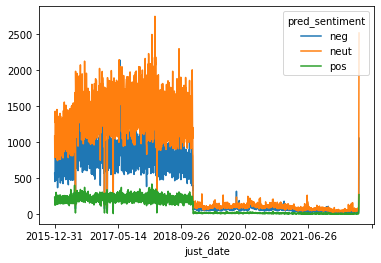

In [20]:
plt.figure()
df_senti.plot()

In [21]:
df_senti['sentiment_score'] = (df_senti['pos']- df_senti['neg'])/(df_senti['pos']+df_senti['neut']+df_senti['neg'])

<AxesSubplot:xlabel='just_date'>

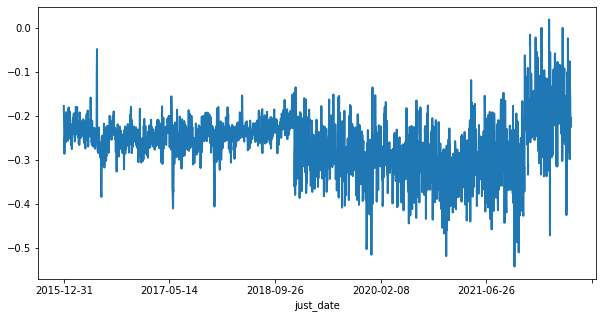

In [33]:
df_senti.sentiment_score.plot(linewidth=2.0, figsize=(10, 5))

In [30]:
df_senti.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2402 entries, 2015-12-31 to 2022-08-01
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   neg              2402 non-null   float64
 1   neut             2402 non-null   float64
 2   pos              2399 non-null   float64
 3   sentiment_score  2399 non-null   float64
dtypes: float64(4)
memory usage: 158.4+ KB


In [35]:
df_senti.index = pd.to_datetime((df_senti.index))
df_senti_monthly = df_senti.resample(rule='M').sum()

In [63]:
df_senti_monthly['sentiment_score'] = (df_senti_monthly['pos']- df_senti_monthly['neg'])/(df_senti_monthly['pos']+df_senti_monthly['neut']+df_senti_monthly['neg'])

In [64]:
df_senti_monthly

pred_sentiment,neg,neut,pos,sentiment_score,first_diff
just_date,,,,,
2015-12-31,566.0,1084.0,232.0,-0.177471,-6.948878
2016-01-31,20562.0,35213.0,6301.0,-0.229735,0.469908
2016-02-29,19907.0,34224.0,6092.0,-0.229397,-0.434210
2016-03-31,21847.0,38400.0,6528.0,-0.229412,0.266352
2016-04-30,20488.0,36821.0,6042.0,-0.228031,-0.673244
...,...,...,...,...,...
2022-04-30,643.0,1436.0,182.0,-0.203892,0.533555
2022-05-31,656.0,2150.0,158.0,-0.168016,0.316236
2022-06-30,693.0,2036.0,208.0,-0.165134,-1.445562


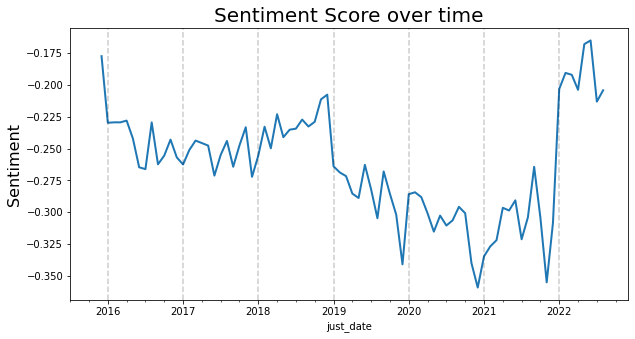

In [65]:
df_senti_monthly.sentiment_score.plot(linewidth=2.0, figsize=(10, 5))
plt.title('Sentiment Score over time', fontsize=20)
plt.ylabel('Sentiment', fontsize=16)
plt.xlim([datetime.date(2015, 7, 31),datetime.date(2022, 12, 31)])
for year in range(2011,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

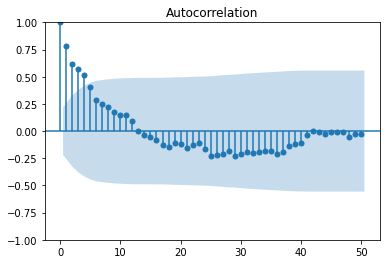

In [66]:
acf_plot = plot_acf(df_senti_monthly.sentiment_score, lags=50)

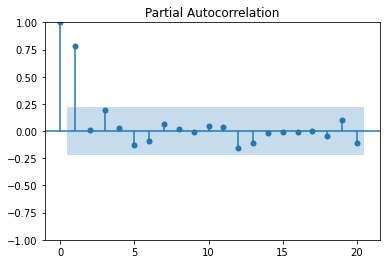

In [67]:
pacf_plot = plot_pacf(df_senti_monthly.sentiment_score, method='ywm')

In [68]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [69]:
perform_adf_test(df_senti_monthly.sentiment_score)

ADF Statistic: -1.635438
p-value: 0.464646


In [70]:
#take first difference
first_diffs = df_senti_monthly.sentiment_score.values[1:] - df_senti_monthly.sentiment_score[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [71]:
df_senti_monthly['first_diff'] =first_diffs

In [72]:
df_senti_monthly.head()

pred_sentiment,neg,neut,pos,sentiment_score,first_diff
just_date,,,,,
2015-12-31,566.0,1084.0,232.0,-0.177471,-0.052264
2016-01-31,20562.0,35213.0,6301.0,-0.229735,0.000337
2016-02-29,19907.0,34224.0,6092.0,-0.229397,-0.000015
2016-03-31,21847.0,38400.0,6528.0,-0.229412,0.001381
2016-04-30,20488.0,36821.0,6042.0,-0.228031,-0.014062


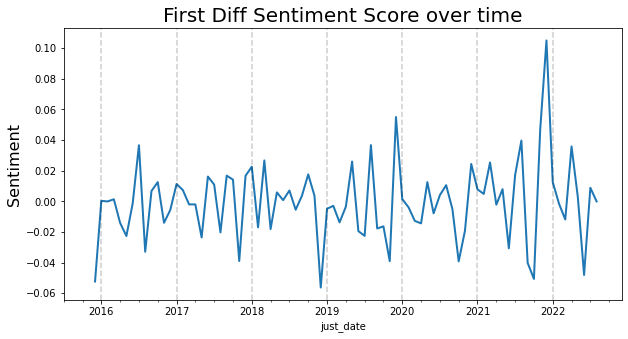

In [73]:
df_senti_monthly.first_diff.plot(linewidth=2.0, figsize=(10, 5))
plt.title('First Diff Sentiment Score over time', fontsize=20)
plt.ylabel('Sentiment', fontsize=16)
plt.xlim([datetime.date(2015, 7, 31),datetime.date(2022, 12, 31)])
for year in range(2011,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [74]:
perform_adf_test(df_senti_monthly.first_diff)

ADF Statistic: -9.459308
p-value: 0.000000


In [75]:
df_published = pd.read_csv('DP_LIVE_15072022170249520.csv')

In [76]:
df_published.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,NLD,CCI,AMPLITUD,LTRENDIDX,M,1973-01,101.4358,NaN
1,NLD,CCI,AMPLITUD,LTRENDIDX,M,1973-02,101.4159,NaN
2,NLD,CCI,AMPLITUD,LTRENDIDX,M,1973-03,101.2529,NaN
3,NLD,CCI,AMPLITUD,LTRENDIDX,M,1973-04,100.9797,NaN
4,NLD,CCI,AMPLITUD,LTRENDIDX,M,1973-05,100.8184,NaN


In [77]:
df_published.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20272 entries, 0 to 20271
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    20272 non-null  object 
 1   INDICATOR   20272 non-null  object 
 2   SUBJECT     20272 non-null  object 
 3   MEASURE     20272 non-null  object 
 4   FREQUENCY   20272 non-null  object 
 5   TIME        20272 non-null  object 
 6   Value       20272 non-null  float64
 7   Flag Codes  0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 1.2+ MB


In [80]:
df_pub_gb = df_published.loc[df_published['LOCATION'].str.contains('GB')]
df_pub_gb

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
5166,GBR,CCI,AMPLITUD,LTRENDIDX,M,1974-01,97.58260,NaN
5167,GBR,CCI,AMPLITUD,LTRENDIDX,M,1974-02,97.62972,NaN
5168,GBR,CCI,AMPLITUD,LTRENDIDX,M,1974-03,97.71487,NaN
5169,GBR,CCI,AMPLITUD,LTRENDIDX,M,1974-04,97.86694,NaN
5170,GBR,CCI,AMPLITUD,LTRENDIDX,M,1974-05,98.02058,NaN
...,...,...,...,...,...,...,...,...
5743,GBR,CCI,AMPLITUD,LTRENDIDX,M,2022-02,97.37798,NaN
5744,GBR,CCI,AMPLITUD,LTRENDIDX,M,2022-03,95.88844,NaN
5745,GBR,CCI,AMPLITUD,LTRENDIDX,M,2022-04,94.61344,NaN
5746,GBR,CCI,AMPLITUD,LTRENDIDX,M,2022-05,93.79876,NaN


In [89]:
date_pub = df_pub_gb.rename(columns={'TIME':'date'})
date_pub.drop(columns=['LOCATION','INDICATOR','SUBJECT','MEASURE','FREQUENCY', 'Flag Codes' ], inplace=True )

In [91]:
date_pub.date =pd.to_datetime(date_pub['date'])

In [98]:
date_pub=date_pub.set_index(['date'])

In [108]:
date_pub.loc[ '1974-01-01':'2015-11-01']

,Value
date,
1974-01-01,97.58260
1974-02-01,97.62972
1974-03-01,97.71487
1974-04-01,97.86694
1974-05-01,98.02058
...,...
2015-07-01,102.31660
2015-08-01,102.29530
2015-09-01,102.21850


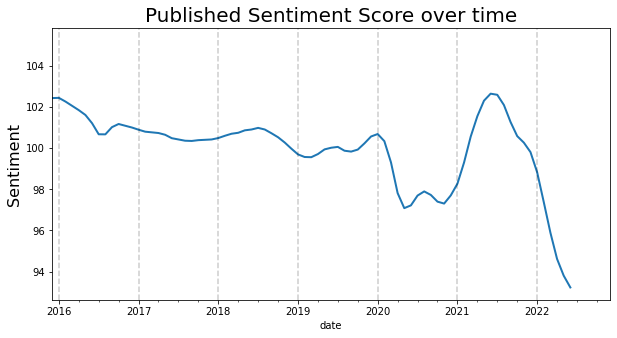

In [103]:
date_pub.Value.plot(linewidth=2.0, figsize=(10, 5))
plt.title('Published Sentiment Score over time', fontsize=20)
plt.ylabel('Sentiment', fontsize=16)
plt.xlim([datetime.date(2015, 12, 31),datetime.date(2022, 12, 31)])
for year in range(1973,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [109]:
perform_adf_test(date_pub.Value)

ADF Statistic: -4.305888
p-value: 0.000434


In [110]:
date_pub_now = date_pub.loc['2015-12-01':'2022-06-30']

In [112]:
perform_adf_test(date_pub_now.Value)

ADF Statistic: -2.133317
p-value: 0.231330


In [113]:
#take first difference
first_diffs = date_pub_now.Value.values[1:] - date_pub_now.Value[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [117]:
date_pub_now= date_pub_now.assign(first_diffs=first_diffs)

In [119]:
perform_adf_test(date_pub_now.first_diffs)

ADF Statistic: -5.759806
p-value: 0.000001


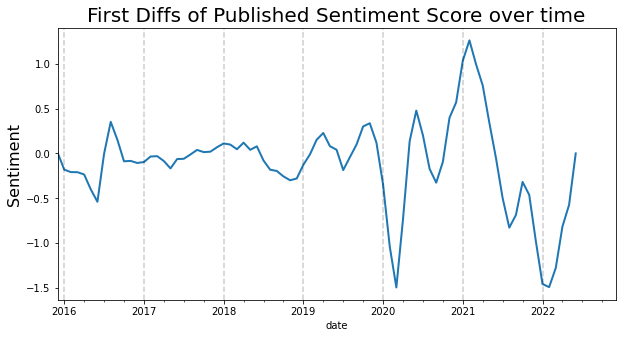

In [120]:
date_pub_now.first_diffs.plot(linewidth=2.0, figsize=(10, 5))
plt.title('First Diffs of Published Sentiment Score over time', fontsize=20)
plt.ylabel('Sentiment', fontsize=16)
plt.xlim([datetime.date(2015, 12, 31),datetime.date(2022, 12, 31)])
for year in range(1973,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [122]:
sent1_tw = df_senti_monthly.first_diff.array

In [123]:
sent1_pub = date_pub_now.Value.array

In [125]:
corr = signal.correlate(sent1_tw, sent1_pub, mode='same')

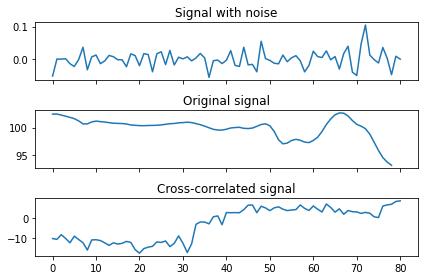

In [130]:
fig, (ax_sent1_tw, ax_sent1_pub, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_sent1_pub.plot(sent1_pub)
ax_sent1_pub.set_title('Original signal')
ax_sent1_tw.plot(sent1_tw)
ax_sent1_tw.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.set_title('Cross-correlated signal')
fig.tight_layout()
plt.show()

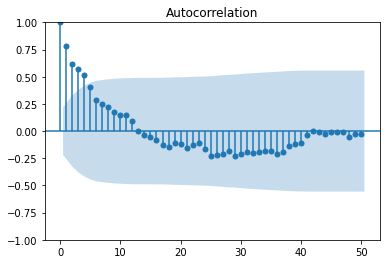

In [531]:
acf_plot = plot_acf(df_senti_monthly.sentiment_score, lags=50)

/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


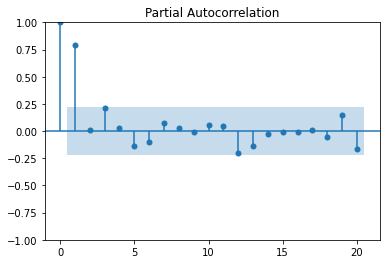

In [532]:
pacf_plot = plot_pacf(df_senti_monthly.sentiment_score)

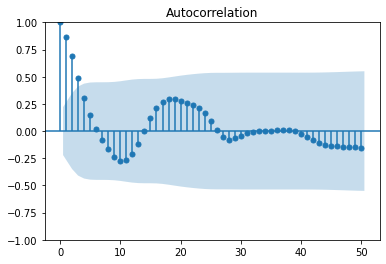

In [133]:
acf_plot = plot_acf(date_pub_now.Value, lags=50)

/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


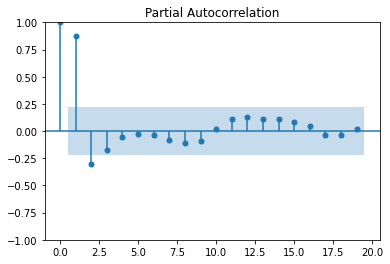

In [134]:
pacf_plot = plot_pacf(date_pub_now.Value)

In [728]:
df_ar_senti = df_senti_monthly['sentiment_score']

In [729]:
df_ar_senti = df_ar_senti

In [730]:
df_ar_senti

just_date
2015-12-31   -0.177471
2016-01-31   -0.229735
2016-02-29   -0.229397
2016-03-31   -0.229412
2016-04-30   -0.228031
                ...   
2022-04-30   -0.203892
2022-05-31   -0.168016
2022-06-30   -0.165134
2022-07-31   -0.213146
2022-08-31   -0.204267
Freq: M, Name: sentiment_score, Length: 81, dtype: float64

In [731]:
#infer frequency of the data
df_ar_senti = df_ar_senti.asfreq(pd.infer_freq((df_senti_monthly.index)))

In [732]:
train_end = datetime(2020,12,31)
test_end = datetime(2022,7, 31)

train_data = df_ar_senti[:train_end]
test_data = df_ar_senti[train_end + timedelta(days=1):test_end]

In [733]:
#create model
model = ARIMA(train_data, order=(2,1,0))

In [734]:
model_fit = model.fit()

In [735]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:        sentiment_score   No. Observations:                   61
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 151.517
Date:                Thu, 11 Aug 2022   AIC                           -297.034
Time:                        23:50:08   BIC                           -290.751
Sample:                    12-31-2015   HQIC                          -294.576
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3260      0.124     -2.628      0.009      -0.569      -0.083
ar.L2         -0.3547      0.129     -2.759      0.006      -0.607      -0.103
sigma2         0.0004   6.48e-05      5.769      0.0

In [736]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [737]:
predictions = model_fit.predict(start=pred_start_date, end = pred_end_date)
residuals = test_data-predictions

In [738]:
'''plt.figure(figsize=(10,5))
plt.plot(residuals)
plt.title('Residuals odf AR(2) model', fontsize=20)
plt.ylabel('Residuals', fontsize=16)
#plt.xlim([datetime.date(2015, 12, 31),datetime.date(2022, 12, 31)])
for year in range(2022,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)'''

"plt.figure(figsize=(10,5))\nplt.plot(residuals)\nplt.title('Residuals odf AR(2) model', fontsize=20)\nplt.ylabel('Residuals', fontsize=16)\n#plt.xlim([datetime.date(2015, 12, 31),datetime.date(2022, 12, 31)])\nfor year in range(2022,2023):\n    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)"

In [739]:
'''plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('Sentiment over time', fontsize=20)
plt.ylabel('Sentiment', fontsize=16)
for year in range(2022,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)'''

"plt.figure(figsize=(10,4))\nplt.plot(test_data)\nplt.plot(predictions)\nplt.legend(('Data', 'Predictions'), fontsize=16)\nplt.title('Sentiment over time', fontsize=20)\nplt.ylabel('Sentiment', fontsize=16)\nfor year in range(2022,2023):\n    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)"

In [740]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.3716


In [741]:
print('Root Mean Squared Error', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error 0.09805657247267059


In [742]:
predictions_rolling = pd.Series(dtype='float64')
for end_date in test_data.index:
    train_data= df_ar_senti[:end_date-timedelta(days=30)]
    model = ARIMA(train_data, order=(2,1,0))
    model_fit = model.fit()
    pred = model_fit.predict(end_date)
    predictions_rolling.loc[end_date] = pred.loc[end_date]

In [743]:
residuals_rolling = test_data-predictions_rolling

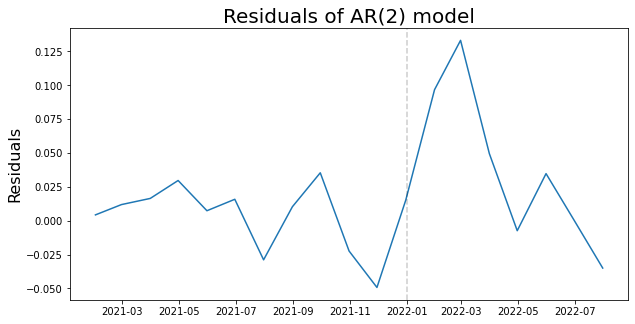

In [744]:
plt.figure(figsize=(10,5))
plt.plot(residuals_rolling)
plt.title('Residuals of AR(2) model', fontsize=20)
plt.ylabel('Residuals', fontsize=16)
#plt.xlim([datetime.date(2015, 12, 31),datetime.date(2022, 12, 31)])
for year in range(2022,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

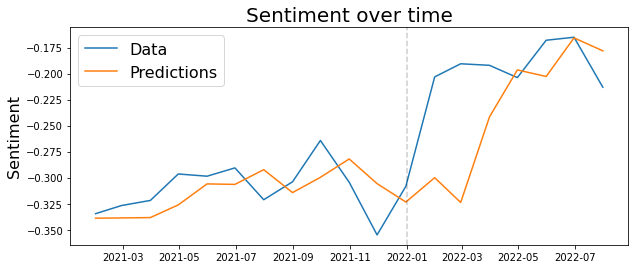

In [745]:
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions_rolling)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('Sentiment over time', fontsize=20)
plt.ylabel('Sentiment', fontsize=16)
for year in range(2022,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [746]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals_rolling/test_data)),4))

Mean Absolute Percent Error: 0.1391


In [747]:
print('Root Mean Squared Error', np.sqrt(np.mean(residuals_rolling**2)))

Root Mean Squared Error 0.04531974197276853


In [749]:
df_ar_pub = date_pub_now['Value']

In [750]:
df_ar_pub  = df_ar_pub.resample('M').last()

In [751]:
df_ar_pub

date
2015-12-31    102.44010
2016-01-31    102.45060
2016-02-29    102.27020
2016-03-31    102.06210
2016-04-30    101.85300
                ...    
2022-02-28     97.37798
2022-03-31     95.88844
2022-04-30     94.61344
2022-05-31     93.79876
2022-06-30     93.22533
Freq: M, Name: Value, Length: 79, dtype: float64

In [663]:
df_ar_pub = df_ar_pub
#infer frequency of the data
df_ar_pub = df_ar_pub.asfreq(pd.infer_freq((df_ar_pub.index)))


In [664]:
train_end = datetime(2020, 12, 31)
test_end = datetime(2022, 5, 31)

train_data = df_ar_pub[:train_end]
test_data = df_ar_pub[train_end + timedelta(days=1):test_end]
#create model
model = ARIMA(train_data, order=(2, 0, 0))
model_fit = model.fit()
print(model_fit.summary())
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   79
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -549.408
Date:                Thu, 11 Aug 2022   AIC                           1106.816
Time:                        23:23:30   BIC                           1116.294
Sample:                    12-31-2015   HQIC                          1110.613
                         - 06-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.995e+04    516.297    193.597      0.000    9.89e+04    1.01e+05
ar.L1          1.8614      0.045     41.414      0.000       1.773       1.949
ar.L2         -0.9280      0.046    -20.102      0.0

In [628]:
'''plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title('Residuals odf AR(2) model', fontsize=20)
plt.ylabel('Residuals', fontsize=16)
#plt.xlim([datetime.date(2015, 12, 31),datetime.date(2022, 12, 31)])
for year in range(2022, 2023):
    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color='k', linestyle='--', alpha=0.2)'''

"plt.figure(figsize=(10, 5))\nplt.plot(residuals)\nplt.title('Residuals odf AR(2) model', fontsize=20)\nplt.ylabel('Residuals', fontsize=16)\n#plt.xlim([datetime.date(2015, 12, 31),datetime.date(2022, 12, 31)])\nfor year in range(2022, 2023):\n    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color='k', linestyle='--', alpha=0.2)"

In [629]:
'''plt.figure(figsize=(10, 4))
plt.plot(test_data)
plt.plot(predictions)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('Sentiment over time', fontsize=20)
plt.ylabel('Sentiment', fontsize=16)
for year in range(2022, 2023):
    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color='k', linestyle='--', alpha=0.2)'''

"plt.figure(figsize=(10, 4))\nplt.plot(test_data)\nplt.plot(predictions)\nplt.legend(('Data', 'Predictions'), fontsize=16)\nplt.title('Sentiment over time', fontsize=20)\nplt.ylabel('Sentiment', fontsize=16)\nfor year in range(2022, 2023):\n    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color='k', linestyle='--', alpha=0.2)"

In [630]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals / test_data)), 4))
print('Root Mean Squared Error', np.sqrt(np.mean(residuals ** 2)))

Mean Absolute Percent Error: 0.0224
Root Mean Squared Error 2877.4865960425145


In [631]:
predictions_rolling = pd.Series(dtype='float64')
for end_date in test_data.index:
    train_data = df_ar_pub[:end_date - timedelta(days=30)]
    model = ARIMA(train_data, order=(2, 0, 0))
    model_fit = model.fit()
    pred = model_fit.predict(end_date)
    predictions_rolling.loc[end_date] = pred.loc[end_date]
residuals_rolling = test_data - predictions_rolling

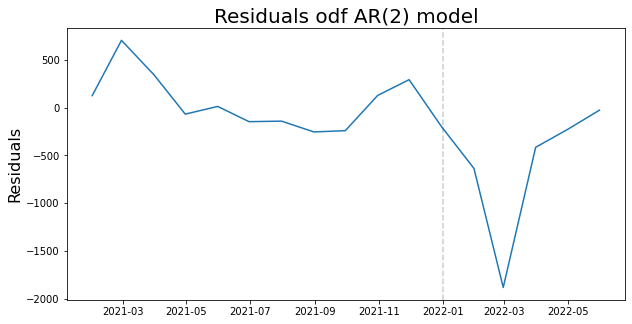

In [632]:
plt.figure(figsize=(10,5))
plt.plot(residuals_rolling)
plt.title('Residuals of AR(2) model', fontsize=20)
plt.ylabel('Residuals', fontsize=16)
#plt.xlim([datetime.date(2015, 12, 31),datetime.date(2022, 12, 31)])
for year in range(2022,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

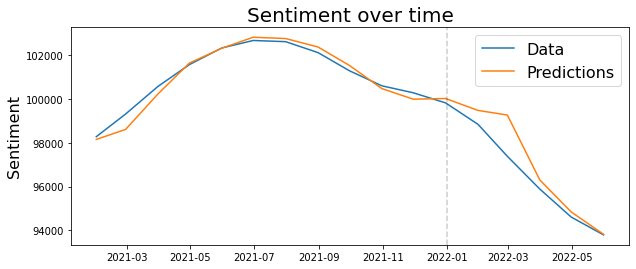

In [633]:
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions_rolling)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('Sentiment over time', fontsize=20)
plt.ylabel('Sentiment', fontsize=16)
for year in range(2022,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [634]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals_rolling / test_data)), 4))
print('Root Mean Squared Error', np.sqrt(np.mean(residuals_rolling ** 2)))

Mean Absolute Percent Error: 0.0035
Root Mean Squared Error 547.9407912425016


In [713]:
predictions_rolling_tw = pd.Series(dtype='float64')
times = len(df_ar_senti.index)
for i in range(10,times-1):
    date = df_ar_senti.index[i]
    #print(date)
    train_data = df_ar_senti[:date - timedelta(days=1)]
    #print(train_data)
    model_tw = ARIMA(train_data, order=(2, 1, 0))
    model_fit_tw = model_tw.fit()
    pred_tw = model_fit_tw.predict(date)
    predictions_rolling_tw.loc[date] = pred_tw.loc[date]
residuals_rolling_tw = df_ar_senti - predictions_rolling_tw

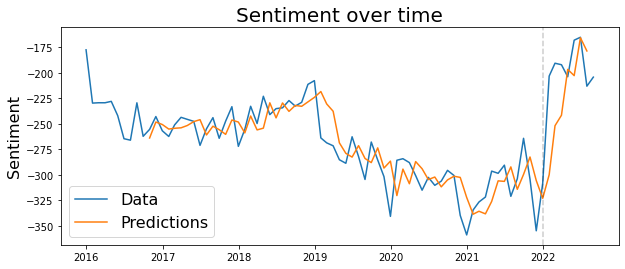

In [714]:
plt.figure(figsize=(10,4))
plt.plot(df_ar_senti)
plt.plot(predictions_rolling_tw)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('Sentiment over time', fontsize=20)
plt.ylabel('Sentiment', fontsize=16)
for year in range(2022,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

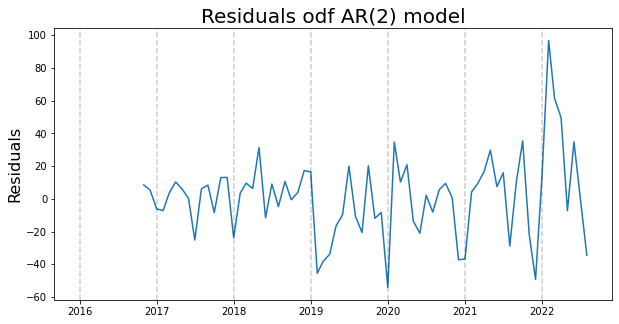

In [715]:
plt.figure(figsize=(10,5))
plt.plot(residuals_rolling_tw)
plt.title('Residuals of AR(2) model', fontsize=20)
plt.ylabel('Residuals', fontsize=16)
#plt.xlim([datetime.date(2015, 12, 31),datetime.date(2022, 12, 31)])
for year in range(2016,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [717]:
predictions_rolling_pub = pd.Series(dtype='float64')
times = len(df_ar_pub.index)
for i in range(10,times-1):
    date = df_ar_pub.index[i]
    #print(date)
    train_data = df_ar_pub[:date - timedelta(days=1)]
    #print(train_data)
    model_pub = ARIMA(train_data, order=(2, 0, 0))
    model_fit_pub = model_pub.fit()
    pred_pub = model_fit_pub.predict(date)
    predictions_rolling_pub.loc[date] = pred_pub.loc[date]
residuals_rolling_pub = df_ar_pub - predictions_rolling_pub

/Users/shaheedismail/Documents/A- MSc Data Science/Msc Thesis/Msc-Project/venv/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


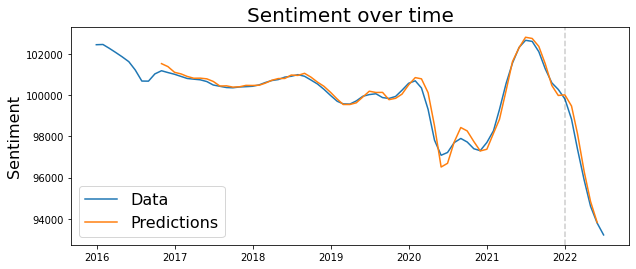

In [718]:
plt.figure(figsize=(10,4))
plt.plot(df_ar_pub)
plt.plot(predictions_rolling_pub)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('Sentiment over time', fontsize=20)
plt.ylabel('Sentiment', fontsize=16)
for year in range(2022,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

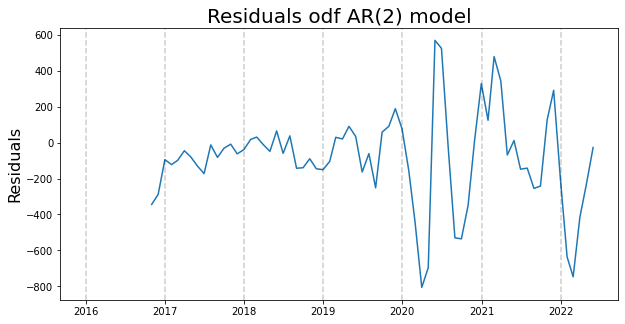

In [719]:
plt.figure(figsize=(10,5))
plt.plot(residuals_rolling_pub)
plt.title('Residuals of AR(2) model', fontsize=20)
plt.ylabel('Residuals', fontsize=16)
#plt.xlim([datetime.date(2015, 12, 31),datetime.date(2022, 12, 31)])
for year in range(2016,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [721]:
df_residuals = pd.DataFrame(columns=['senti', 'pub'])

In [723]:
df_residuals['senti'] = residuals_rolling_tw

In [755]:
df_residuals['pub'] = residuals_rolling_pub/10

In [756]:
df_residuals

,senti,pub
2015-12-31,NaN,NaN
2016-01-31,NaN,NaN
2016-02-29,NaN,NaN
2016-03-31,NaN,NaN
2016-04-30,NaN,NaN
...,...,...
2022-04-30,-7.225014,-23.194866
2022-05-31,34.783227,-2.763367
2022-06-30,0.482140,NaN
2022-07-31,-34.551401,NaN


<AxesSubplot:>

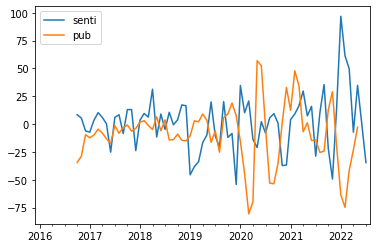

In [757]:
df_residuals.plot()

In [759]:
df_residuals.corr()

,senti,pub
senti,1.000000,-0.443605
pub,-0.443605,1.000000
